In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("automobileEDA.csv")
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# Regresión lineal simple
'''La existencia de una variable dependiente (Y) 
y otra variable independiente/explicativa (X)'''

from sklearn.linear_model import LinearRegression

In [6]:
# Crear un objeto
mco=LinearRegression()
mco


LinearRegression()

In [7]:
# Como las millas por hora recorrida impacta en el precio
X= df[['highway-mpg']]
Y= df['price']

In [9]:
mco.fit(X,Y)

LinearRegression()

In [11]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [10]:
y_estimado=mco.predict(X) # esto realiza la regresion
y_estimado[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
print(mco.intercept_) # intercepto de la regresion
print(mco.coef_) # los coeficientes de la regresion

'''Funcion de regresion seria Price = 38423,31 - 821,73*highway-mpg'''

38423.305858157386
[-821.73337832]


In [13]:
import scipy.stats
import statsmodels.api as sm

In [15]:
X=df[['engine-size']]
Y=df['price']

X=sm.add_constant(X) # esto add un intercepto

regresion=sm.OLS(Y,X).fit() # realiza la regresion / 1ra parte
resultados=regresion.predict(X) # presenta los resultados / 2da parte

regresion.summary() # para mostrar el detalle de la regresion

'''Nuestro modelo de regresion seria
Precio/Y_estimado = -7963,3 + 166,9*engine-size'''


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     633.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           9.27e-64
Time:                        20:26:02   Log-Likelihood:                -1946.0
No. Observations:                 201   AIC:                             3896.
Df Residuals:                     199   BIC:                             3903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7963.3389    884.835     -9.000      0.000   -9708.196   -6218.482
engine-size   166.8600      6.629     25.170      0.000     153.787     179.933
==============================================================================
Omnibus:                       26.285   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.653
Skew:                           0.778   Prob(JB):                     6.66e-09
Kurtosis:                       4.441   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df.loc[:,'engine-size'] 

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

In [16]:
resultados

0      13728.463134
1      13728.463134
2      17399.383479
3      10224.402804
4      14729.623228
           ...     
196    15563.923306
197    15563.923306
198    20903.443808
199    16231.363369
200    15563.923306
Length: 201, dtype: float64

In [20]:
df.loc[:,'price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [25]:
# Regresion multiple
'''Y = variable dependiente
X1= variable explicativa
X2=variable explicativa
.
.
.
Xn'''

Y = df ['price']
X= df[['horsepower','engine-size','highway-mpg','symboling']]
mco.fit(X,Y)
print(mco.intercept_)
print(mco.coef_)

-2273.5453978896694
[  45.0758976   118.26025831 -131.86025778 -164.63882415]


In [29]:
X=sm.add_constant(X)
modelo=sm.OLS(Y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           8.22e-66
Time:                        20:41:43   Log-Likelihood:                -1931.6
No. Observations:                 201   AIC:                             3873.
Df Residuals:                     196   BIC:                             3890.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2273.5454   3075.876     -0.739      0.461   -8339.608    3792.517
horsepower     45.0759     15.923      2.831      0.005      13.673      76.479
engine-size   118.2603     11.489     10.293      0.000      95.602     140.918
highway-mpg  -131.8603     64.733     -2.037      0.043    -259.522      -4.198
symboling    -164.6388    219.571     -0.750      0.454    -597.665     268.387
==============================================================================
Omnibus:                       11.523   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.074
Skew:                           0.349   Prob(JB):                     0.000196
Kurtosis:                       4.245   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

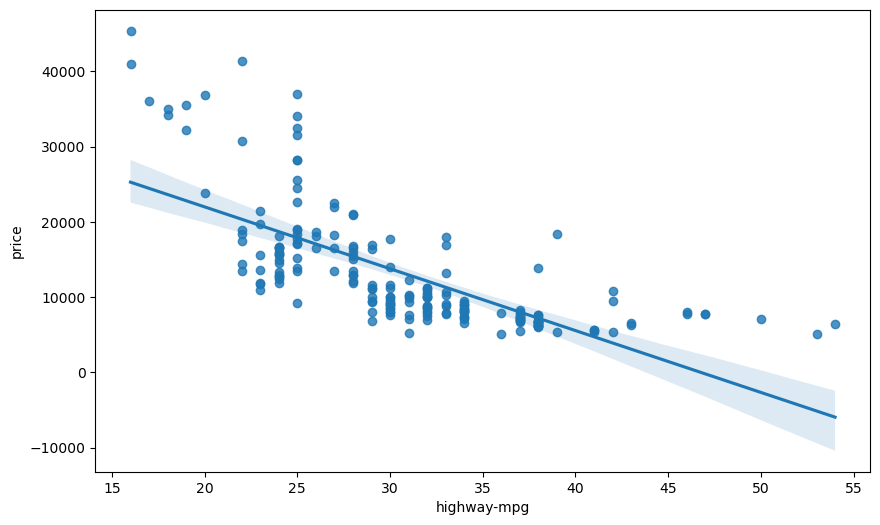

In [32]:
#  Ver el modelo de regresion a traves de graficos
'''Grafico de regresion'''

plt.figure(figsize=(10,6))

sns.regplot(x='highway-mpg',y='price',data=df)
plt.show()

In [34]:
X= df[['highway-mpg']]
Y= df['price']
mco.fit(X,Y)
y_estimado=mco.predict(X)
y_estimado

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [35]:
df.loc[:,'highway-mpg']

0      27
1      27
2      26
3      30
4      22
       ..
196    28
197    25
198    23
199    27
200    25
Name: highway-mpg, Length: 201, dtype: int64

In [36]:
df.loc[:,'price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

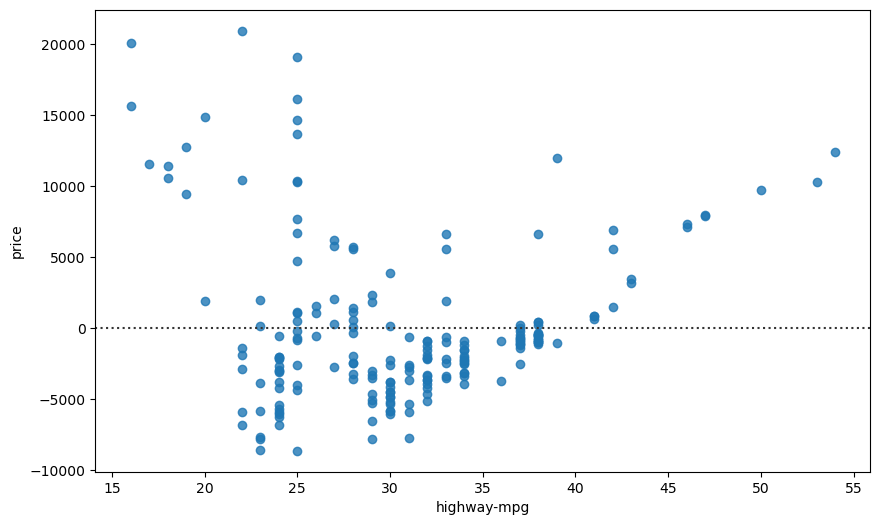

In [38]:
# Grafico de residuos
plt.figure(figsize=(10,6))
sns.residplot(data=df,x='highway-mpg',y='price')
plt.show()
'''El grafico nos indica que los valores no estan dispersos
de manera aleatoria. Por tanto, el modelo de regresion linea no se ajusta a los datos
que tenemos'''

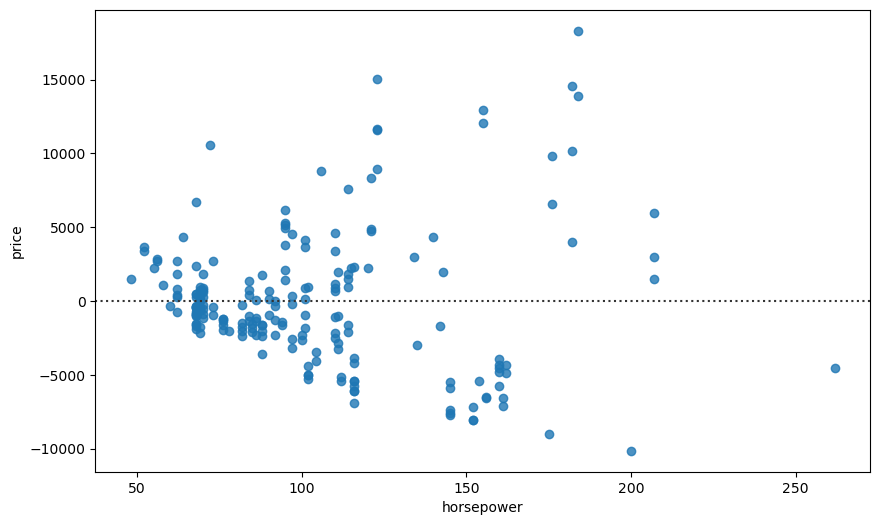

In [40]:
plt.figure(figsize=(10,6))
sns.residplot(x='horsepower',y='price',data=df)
plt.show()

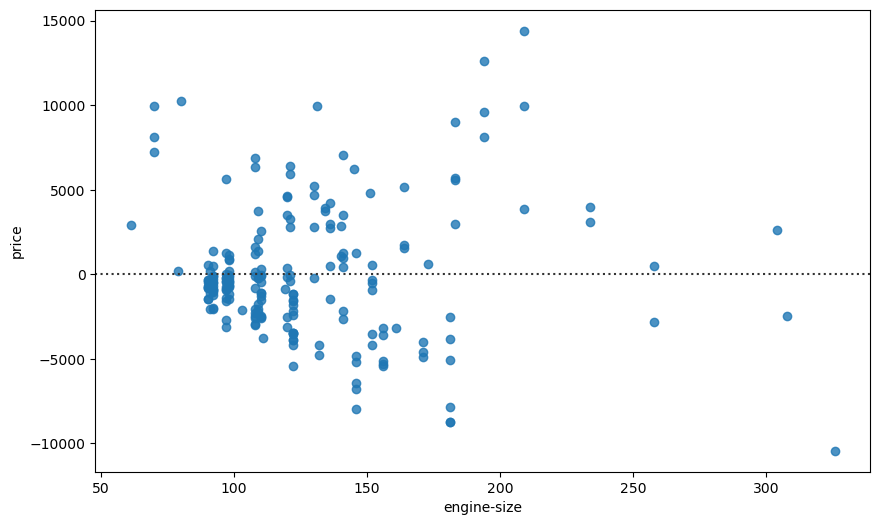

In [41]:
plt.figure(figsize=(10,6))
sns.residplot(x='engine-size',y='price',data=df)
plt.show()